In [1]:
!yes | sudo apt install python3.8-venv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.8-venv is already the newest version (3.8.10-0ubuntu1~20.04.6).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.
yes: standard output: Broken pipe


In [2]:
!sudo apt-get install gcc g\+\+

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
gcc is already the newest version (4:9.3.0-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.


In [3]:
!yes | pip uninstall detectron2

Found existing installation: detectron2 0.6+cu111
Uninstalling detectron2-0.6+cu111:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/detectron2-0.6+cu111.dist-info/*
    /usr/local/lib/python3.8/dist-packages/detectron2/*
    /usr/local/lib/python3.8/dist-packages/tools/*
Proceed (Y/n)?   Successfully uninstalled detectron2-0.6+cu111
yes: standard output: Broken pipe


In [5]:
#johannes try
#!pip install torch==1.10.1 torchvision==0.11.2 torchaudio==0.10.1

In [4]:
# dinah try
!pip3 install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [5]:
# use to remove old detectron installations
!rm -r detectron2

In [7]:
!pip3 install ninja

In [8]:
!python3 -m pip install setuptools==58.2.0

In [9]:
#!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [10]:
#make sure detectron installation files knows where to find torch
!LD_LIBRARY_PATH=.../python3.9/site-packages/torch/lib/nvidia/cublas/lib/:$LD_LIBRARY_PATH

In [11]:
!python -m pip install pyyaml==5.3.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

  Using cached PyYAML-5.3.1-cp38-cp38-linux_x86_64.whl
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.1
    Uninstalling PyYAML-5.1:
      Successfully uninstalled PyYAML-5.1
Cloning into 'detectron2'...
remote: Enumerating objects: 14935, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 14935 (delta 7), reused 13 (delta 3), pack-reused 14915
Receiving objects: 100% (14935/14935), 6.06 MiB | 20.74 MiB/s, done.
Resolving deltas: 100% (10823/10823), done.


In [12]:
import sys, os, distutils.core
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.9 ; cuda:  cu111
detectron2: 0.6


In [13]:
!pip3 install opencv-python

In [14]:
!yes | sudo apt-get install libgl1-mesa-glx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (21.2.6-0ubuntu0.1~20.04.2).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.
yes: standard output: Broken pipe


In [15]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os
import json
import cv2
import random

from datetime import datetime
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances


In [16]:
!LD_LIBRARY_PATH=.../python3.9/site-packages/cv2/:$LD_LIBRARY_PATH

In [17]:
os.getcwd()

'/workspace/scripts'

In [19]:
## CRASHT DAS KERNEL !!
#cv2.imshow("testimage", im)

## Train on our dataset

In [20]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=3

torch.cuda.empty_cache()


env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=3


In [23]:
print(torch.cuda.memory_summary(device=3, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 3                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

In [18]:
# we set a counter to register the same dataset again under a different name when we are debugging
global regis_num 
regis_num = 0

In [19]:
# Taken from https://eidos-ai.medium.com/training-on-detectron2-with-a-validation-set-and-plot-loss-on-it-to-avoid-overfitting-6449418fbf4e
# https://gist.github.com/ortegatron/c0dad15e49c2b74de8bb09a5615d9f6b

from EvalLossHook import LossEvalHook
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data import DatasetMapper


class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)
                     
    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1,LossEvalHook(
            self.cfg.TEST.EVAL_PERIOD,
            self.model,
            build_detection_test_loader(
                self.cfg,
                self.cfg.DATASETS.TEST[0],
                DatasetMapper(self.cfg,True)
            )
        ))
        return hooks

In [1]:
def train_detectron_standard(dataset_name_train, dataset_name_val, resolution, batch_size=2):

    '''
    func:   trains a standard detectron model with the given dataset name

    inputs:
    dataset_name_train: string name of the dataset that was registered with COCODataset
    resolution:         the resolution that the images have

    returns:
    cfg:        configurations object
    trainer:    trainer object from the model
    predictor:  predictor object from the model
    '''
    now = datetime.now() 
    output_dir = f"/workspace/output/output_res{resolution}_bs{str(batch_size)}_{now.strftime('%m.%d.%H.%M')}"
    print("OUTPUT DIR:" ,output_dir)
    cfg = get_cfg()
    cfg.INPUT.FORMAT = "RGB"
    
    # try different model: changed to X101 FPN: faster_rcnn_X_101_32x8d_FPN_3x
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
    cfg.OUTPUT_DIR = output_dir
    cfg.DATASETS.TRAIN = (dataset_name_train)
    cfg.DATASETS.TEST = (dataset_name_val,)
    cfg.TEST.EVAL_PERIOD = 2000
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
    cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[4, 8, 16, 32, 64]]
    cfg.SOLVER.IMS_PER_BATCH = batch_size  # This is the real "batch size" commonly known to deep learning people
    cfg.SOLVER.BASE_LR = 0.000025  # pick a good LR - davor
    cfg.SOLVER.MAX_ITER = 6000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
    cfg.SOLVER.STEPS = [2500,4000,5000]        # decay learning rate
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # has two plus one classes transmission and distribution tower + other towers. (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
    # NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

    #print(cfg.OUTPUT_DIR)


    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    trainer = MyTrainer(cfg) 
    trainer.resume_or_load(resume=False)
    trainer.train()


    # Inference should use the config with parameters that are used in training
    # cfg now already contains everything we've set previously. We changed it a little bit for inference:
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3   # set a custom testing threshold
    predictor = DefaultPredictor(cfg)


    return cfg, trainer, predictor

def evaluate_detectron(cfg, predictor_obj, resolution, dataset_name_val): 

    """
    func:   evaluates a trained detectron model

    input:
    cfg:                configuration object of the model
    predictor_obj:      the predictor object of the same model 
    resolution:         the resolution of the images
    dataset_name_val:   the COCO registered name of the val dataset

    returns:            dictionary with model metrics 
    """

    evaluator = COCOEvaluator(dataset_name_val, output_dir="/workspace/output/output"+str(resolution), max_dets_per_image = 30)
    val_loader = build_detection_test_loader(cfg, dataset_name_val)
    
    return inference_on_dataset(predictor_obj.model, val_loader, evaluator)
    # another equivalent way to evaluate the model is to use `trainer.test`

In [32]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg = get_cfg()

In [33]:
from pprint import pprint

In [34]:
pprint(cfg)

{'CUDNN_BENCHMARK': False,
 'DATALOADER': {'ASPECT_RATIO_GROUPING': True,
                'FILTER_EMPTY_ANNOTATIONS': True,
                'NUM_WORKERS': 4,
                'REPEAT_THRESHOLD': 0.0,
                'SAMPLER_TRAIN': 'TrainingSampler'},
 'DATASETS': {'PRECOMPUTED_PROPOSAL_TOPK_TEST': 1000,
              'PRECOMPUTED_PROPOSAL_TOPK_TRAIN': 2000,
              'PROPOSAL_FILES_TEST': (),
              'PROPOSAL_FILES_TRAIN': (),
              'TEST': (),
              'TRAIN': ()},
 'GLOBAL': CfgNode({'HACK': 1.0}),
 'INPUT': {'CROP': {'ENABLED': False,
                    'SIZE': [0.9, 0.9],
                    'TYPE': 'relative_range'},
           'FORMAT': 'BGR',
           'MASK_FORMAT': 'polygon',
           'MAX_SIZE_TEST': 1333,
           'MAX_SIZE_TRAIN': 1333,
           'MIN_SIZE_TEST': 800,
           'MIN_SIZE_TRAIN': (800,),
           'MIN_SIZE_TRAIN_SAMPLING': 'choice',
           'RANDOM_FLIP': 'horizontal'},
 'MODEL': {'ANCHOR_GENERATOR': {'ANGLES': [[-90, 

In [ ]:
# notes for parameters
# max_dets_per_image Anzahl zu detektierender Objekte - wir haben Bilder mit bis zu 30 Türmen
# set learning rate von 0.00025 auf 0.0025
# set training iterations von 300 auf 1000

### Experiments to conduct / TODO

- train, val, test split
- loss curves plotten
- influence of batch size 
- ROI heads verkleinern
- learning rate
- image augmentation when training in loader

In [34]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [35]:
base_path = '/workspace/data/'

#im = cv2.imread(base_path + "data_30/data.png")

In [36]:
base_path 

'/workspace/data/'

In [37]:
resolution_set = ['030']#, '035','040','045','050','070','100']
batch_size = [2]

eval_objs = []
for bs in batch_size:

    res = '030'
    #define the names 
    dataset_name_train = "tower_train_" + str(res) + "1"
    dataset_name_val = "tower_val_" + str(res) + "1"

    try: 
        # if it throws an error that name is already registered, just change the name... 
        register_coco_instances(dataset_name_train, {}, base_path+"labels_train.json", base_path+"data_"+str(res)+"/train/data")
        register_coco_instances(dataset_name_val, {}, base_path+"labels_val.json", base_path+"data_"+str(res)+"/val/data")

        #MetadataCatalog.get(dataset_name_train).set(thing_classes=["distribution", "transmission"])
        #MetadataCatalog.get(dataset_name_val).set(thing_classes=["distribution", "transmission"])
    
    except: 
        regis_num += 1
        dataset_name_train += str(regis_num)
        dataset_name_val += str(regis_num)

        # if it throws an error that name is already registered, just change the name... 
        register_coco_instances(dataset_name_train, {}, base_path+"labels_train.json", base_path+"data_"+str(res)+"/train/data")
        register_coco_instances(dataset_name_val, {}, base_path+"labels_val.json", base_path+"data_"+str(res)+"/val/data")
        #MetadataCatalog.get(dataset_name_train).set(thing_classes=["distribution", "transmission"])
        #MetadataCatalog.get(dataset_name_val).set(thing_classes=["distribution", "transmission"])

    configuration, train_obj, predictor_obj = train_detectron_standard(dataset_name_train, dataset_name_val, res, batch_size = bs)

    eval_objs.append(evaluate_detectron(configuration, predictor_obj, res, dataset_name_val))

with open('../eval.txt', 'w') as f:
    f.write(str(eval_objs))

OUTPUT DIR: /workspace/output/output_res030_bs2_03.22.13.44
[03/22 13:44:22 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNor

WARNING [03/22 13:44:22 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/22 13:44:22 d2.data.datasets.coco]: Loaded 11696 images in COCO format from /workspace/data/labels_train.json
[03/22 13:44:23 d2.data.build]: Removed 0 images with no usable annotations. 11696 images left.
[03/22 13:44:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[03/22 13:44:23 d2.data.build]: Using training sampler TrainingSampler
[03/22 13:44:23 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[03/22 13:44:23 d2.data.common]: Serializing 11696 elements to byte tensors and concatenating them all ...
[03/22 13:44:23 d2.data.common]: Serialized dataset takes 5.84 MiB
[03/22 13:44:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used i

Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (3, 256, 1, 1) in the checkpoint but (15, 256, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.weight' to the model due to incompatible shapes: (12, 256, 1, 1) in the checkpoint but (60, 256, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.bias' to the model due to incompatible shapes: (12,) in the checkpoint but (60,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible

[03/22 13:44:23 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[03/22 13:44:25 d2.utils.events]:  eta: 0:07:51  iter: 19  total_loss: 2.288  loss_cls: 1.469  loss_box_reg: 0.001061  loss_rpn_cls: 0.7331  loss_rpn_loc: 0.09873    time: 0.0792  last_time: 0.0814  data_time: 0.0093  last_data_time: 0.0026   lr: 4.9952e-07  max_mem: 1980M
[03/22 13:44:27 d2.utils.events]:  eta: 0:07:52  iter: 39  total_loss: 2.207  loss_cls: 1.399  loss_box_reg: 0.0008541  loss_rpn_cls: 0.7285  loss_rpn_loc: 0.07259    time: 0.0788  last_time: 0.0779  data_time: 0.0029  last_data_time: 0.0025   lr: 9.9902e-07  max_mem: 1980M
[03/22 13:44:28 d2.utils.events]:  eta: 0:07:46  iter: 59  total_loss: 2.076  loss_cls: 1.287  loss_box_reg: 0.0007109  loss_rpn_cls: 0.7251  loss_rpn_loc: 0.05513    time: 0.0779  last_time: 0.0789  data_time: 0.0026  last_data_time: 0.0023   lr: 1.4985e-06  max_mem: 1980M
[03/22 13:44:30 d2.utils.events]:  eta: 0:07:41  iter: 79  total_loss: 1.928  loss_cls: 1.117  loss_box_reg: 0.0004985  loss_rpn_cls: 0.7285  loss_rpn_loc: 0.06366    time: 0.0

[03/22 13:45:12 d2.utils.events]:  eta: 0:06:59  iter: 619  total_loss: 0.6134  loss_cls: 0.07789  loss_box_reg: 0.0003333  loss_rpn_cls: 0.4899  loss_rpn_loc: 0.05361    time: 0.0781  last_time: 0.0691  data_time: 0.0028  last_data_time: 0.0026   lr: 1.5485e-05  max_mem: 2070M
[03/22 13:45:14 d2.utils.events]:  eta: 0:06:58  iter: 639  total_loss: 0.6407  loss_cls: 0.07595  loss_box_reg: 0.0004717  loss_rpn_cls: 0.4761  loss_rpn_loc: 0.0584    time: 0.0781  last_time: 0.0713  data_time: 0.0026  last_data_time: 0.0026   lr: 1.5984e-05  max_mem: 2070M
[03/22 13:45:15 d2.utils.events]:  eta: 0:06:56  iter: 659  total_loss: 0.6612  loss_cls: 0.06434  loss_box_reg: 0.0005682  loss_rpn_cls: 0.4715  loss_rpn_loc: 0.08866    time: 0.0781  last_time: 0.0808  data_time: 0.0027  last_data_time: 0.0029   lr: 1.6484e-05  max_mem: 2070M
[03/22 13:45:17 d2.utils.events]:  eta: 0:06:55  iter: 679  total_loss: 0.5724  loss_cls: 0.0517  loss_box_reg: 0.0002163  loss_rpn_cls: 0.4405  loss_rpn_loc: 0.048

[03/22 13:46:00 d2.utils.events]:  eta: 0:06:16  iter: 1219  total_loss: 0.5033  loss_cls: 0.06411  loss_box_reg: 0.0007001  loss_rpn_cls: 0.3148  loss_rpn_loc: 0.0868    time: 0.0785  last_time: 0.0831  data_time: 0.0027  last_data_time: 0.0034   lr: 2.5e-05  max_mem: 2070M
[03/22 13:46:01 d2.utils.events]:  eta: 0:06:14  iter: 1239  total_loss: 0.4416  loss_cls: 0.05609  loss_box_reg: 0.0002968  loss_rpn_cls: 0.2887  loss_rpn_loc: 0.07041    time: 0.0785  last_time: 0.0789  data_time: 0.0027  last_data_time: 0.0021   lr: 2.5e-05  max_mem: 2070M
[03/22 13:46:03 d2.utils.events]:  eta: 0:06:13  iter: 1259  total_loss: 0.3457  loss_cls: 0.05687  loss_box_reg: 0.004243  loss_rpn_cls: 0.2431  loss_rpn_loc: 0.04733    time: 0.0785  last_time: 0.0790  data_time: 0.0030  last_data_time: 0.0032   lr: 2.5e-05  max_mem: 2070M
[03/22 13:46:05 d2.utils.events]:  eta: 0:06:12  iter: 1279  total_loss: 0.366  loss_cls: 0.0543  loss_box_reg: 0.004783  loss_rpn_cls: 0.2384  loss_rpn_loc: 0.06116    ti

[03/22 13:46:47 d2.utils.events]:  eta: 0:05:29  iter: 1819  total_loss: 0.4487  loss_cls: 0.05514  loss_box_reg: 0.0002923  loss_rpn_cls: 0.2954  loss_rpn_loc: 0.08812    time: 0.0787  last_time: 0.0792  data_time: 0.0026  last_data_time: 0.0027   lr: 2.5e-05  max_mem: 2107M
[03/22 13:46:49 d2.utils.events]:  eta: 0:05:28  iter: 1839  total_loss: 0.447  loss_cls: 0.0521  loss_box_reg: 0.00398  loss_rpn_cls: 0.27  loss_rpn_loc: 0.1005    time: 0.0787  last_time: 0.0775  data_time: 0.0025  last_data_time: 0.0024   lr: 2.5e-05  max_mem: 2107M
[03/22 13:46:51 d2.utils.events]:  eta: 0:05:27  iter: 1859  total_loss: 0.3629  loss_cls: 0.04886  loss_box_reg: 0.0003334  loss_rpn_cls: 0.2422  loss_rpn_loc: 0.08505    time: 0.0787  last_time: 0.0770  data_time: 0.0028  last_data_time: 0.0026   lr: 2.5e-05  max_mem: 2107M
[03/22 13:46:52 d2.utils.events]:  eta: 0:05:25  iter: 1879  total_loss: 0.4086  loss_cls: 0.05107  loss_box_reg: 0.005178  loss_rpn_cls: 0.2366  loss_rpn_loc: 0.08806    time:

[03/22 13:48:55 d2.utils.events]:  eta: 0:05:14  iter: 2039  total_loss: 0.4385  loss_cls: 0.07235  loss_box_reg: 0.005026  loss_rpn_cls: 0.271  loss_rpn_loc: 0.08071  validation_loss: 0.4095    time: 0.0789  last_time: 0.0759  data_time: 0.0028  last_data_time: 0.0032   lr: 2.5e-05  max_mem: 2107M
[03/22 13:48:57 d2.utils.events]:  eta: 0:05:12  iter: 2059  total_loss: 0.4299  loss_cls: 0.06859  loss_box_reg: 0.01838  loss_rpn_cls: 0.2468  loss_rpn_loc: 0.06506  validation_loss: 0.4095    time: 0.0789  last_time: 0.0815  data_time: 0.0028  last_data_time: 0.0027   lr: 2.5e-05  max_mem: 2107M
[03/22 13:48:59 d2.utils.events]:  eta: 0:05:11  iter: 2079  total_loss: 0.4265  loss_cls: 0.07134  loss_box_reg: 0.0173  loss_rpn_cls: 0.2545  loss_rpn_loc: 0.06315  validation_loss: 0.4095    time: 0.0789  last_time: 0.0800  data_time: 0.0027  last_data_time: 0.0025   lr: 2.5e-05  max_mem: 2107M
[03/22 13:49:00 d2.utils.events]:  eta: 0:05:09  iter: 2099  total_loss: 0.4624  loss_cls: 0.06937  l

[03/22 13:49:40 d2.utils.events]:  eta: 0:04:29  iter: 2599  total_loss: 0.4157  loss_cls: 0.0844  loss_box_reg: 0.03368  loss_rpn_cls: 0.2188  loss_rpn_loc: 0.062  validation_loss: 0.4095    time: 0.0789  last_time: 0.0757  data_time: 0.0026  last_data_time: 0.0025   lr: 2.5e-06  max_mem: 2107M
[03/22 13:49:41 d2.utils.events]:  eta: 0:04:27  iter: 2619  total_loss: 0.3989  loss_cls: 0.08134  loss_box_reg: 0.02861  loss_rpn_cls: 0.2367  loss_rpn_loc: 0.04826  validation_loss: 0.4095    time: 0.0789  last_time: 0.0773  data_time: 0.0025  last_data_time: 0.0022   lr: 2.5e-06  max_mem: 2107M
[03/22 13:49:43 d2.utils.events]:  eta: 0:04:26  iter: 2639  total_loss: 0.5842  loss_cls: 0.0855  loss_box_reg: 0.03934  loss_rpn_cls: 0.2702  loss_rpn_loc: 0.07165  validation_loss: 0.4095    time: 0.0789  last_time: 0.0760  data_time: 0.0024  last_data_time: 0.0022   lr: 2.5e-06  max_mem: 2107M
[03/22 13:49:45 d2.utils.events]:  eta: 0:04:24  iter: 2659  total_loss: 0.426  loss_cls: 0.08421  loss_

[03/22 13:50:24 d2.utils.events]:  eta: 0:03:44  iter: 3159  total_loss: 0.4684  loss_cls: 0.07761  loss_box_reg: 0.03055  loss_rpn_cls: 0.2424  loss_rpn_loc: 0.0653  validation_loss: 0.4095    time: 0.0789  last_time: 0.0793  data_time: 0.0026  last_data_time: 0.0028   lr: 2.5e-06  max_mem: 2126M
[03/22 13:50:26 d2.utils.events]:  eta: 0:03:42  iter: 3179  total_loss: 0.5305  loss_cls: 0.07074  loss_box_reg: 0.01813  loss_rpn_cls: 0.2769  loss_rpn_loc: 0.08202  validation_loss: 0.4095    time: 0.0789  last_time: 0.0795  data_time: 0.0026  last_data_time: 0.0024   lr: 2.5e-06  max_mem: 2126M
[03/22 13:50:27 d2.utils.events]:  eta: 0:03:41  iter: 3199  total_loss: 0.4681  loss_cls: 0.08813  loss_box_reg: 0.04047  loss_rpn_cls: 0.2442  loss_rpn_loc: 0.06993  validation_loss: 0.4095    time: 0.0789  last_time: 0.0847  data_time: 0.0029  last_data_time: 0.0030   lr: 2.5e-06  max_mem: 2126M
[03/22 13:50:29 d2.utils.events]:  eta: 0:03:39  iter: 3219  total_loss: 0.446  loss_cls: 0.08853  lo

[03/22 13:51:09 d2.utils.events]:  eta: 0:03:01  iter: 3719  total_loss: 0.3982  loss_cls: 0.1009  loss_box_reg: 0.05939  loss_rpn_cls: 0.1859  loss_rpn_loc: 0.0407  validation_loss: 0.4095    time: 0.0790  last_time: 0.0816  data_time: 0.0027  last_data_time: 0.0027   lr: 2.5e-06  max_mem: 2126M
[03/22 13:51:11 d2.utils.events]:  eta: 0:02:59  iter: 3739  total_loss: 0.4238  loss_cls: 0.09885  loss_box_reg: 0.03662  loss_rpn_cls: 0.2203  loss_rpn_loc: 0.0612  validation_loss: 0.4095    time: 0.0790  last_time: 0.0778  data_time: 0.0028  last_data_time: 0.0026   lr: 2.5e-06  max_mem: 2126M
[03/22 13:51:12 d2.utils.events]:  eta: 0:02:58  iter: 3759  total_loss: 0.3825  loss_cls: 0.08166  loss_box_reg: 0.04299  loss_rpn_cls: 0.2076  loss_rpn_loc: 0.0506  validation_loss: 0.4095    time: 0.0790  last_time: 0.0776  data_time: 0.0025  last_data_time: 0.0024   lr: 2.5e-06  max_mem: 2126M
[03/22 13:51:14 d2.utils.events]:  eta: 0:02:56  iter: 3779  total_loss: 0.4032  loss_cls: 0.07171  loss

[03/22 13:52:24 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP    | category   | AP    |
|:-----------|:------|:-----------|:------|
| DT         | 0.088 | TT         | 0.000 |
[03/22 13:52:24 d2.engine.defaults]: Evaluation results for tower_val_03012 in csv format:
[03/22 13:52:24 d2.evaluation.testing]: copypaste: Task: bbox
[03/22 13:52:24 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[03/22 13:52:24 d2.evaluation.testing]: copypaste: 0.0442,0.1947,0.0045,0.0523,0.0020,0.0000
[03/22 13:53:26 d2.utils.events]:  eta: 0:02:39  iter: 3999  total_loss: 0.4484  loss_cls: 0.0921  loss_box_reg: 0.0433  loss_rpn_cls: 0.2269  loss_rpn_loc: 0.07332  validation_loss: 0.445    time: 0.0790  last_time: 0.0792  data_time: 0.0030  last_data_time: 0.0031   lr: 2.5e-06  max_mem: 2126M
[03/22 13:53:27 d2.utils.events]:  eta: 0:02:37  iter: 4019  total_loss: 0.43  loss_cls: 0.09008  loss_box_reg: 0.03159  loss_rpn_cls: 0.237  loss_rpn_loc: 0.06633  validation_lo

[03/22 13:54:07 d2.utils.events]:  eta: 0:01:57  iter: 4519  total_loss: 0.4186  loss_cls: 0.091  loss_box_reg: 0.04234  loss_rpn_cls: 0.2319  loss_rpn_loc: 0.06676  validation_loss: 0.445    time: 0.0791  last_time: 0.0796  data_time: 0.0028  last_data_time: 0.0023   lr: 2.5e-07  max_mem: 2126M
[03/22 13:54:09 d2.utils.events]:  eta: 0:01:55  iter: 4539  total_loss: 0.4188  loss_cls: 0.09459  loss_box_reg: 0.03731  loss_rpn_cls: 0.2157  loss_rpn_loc: 0.05166  validation_loss: 0.445    time: 0.0791  last_time: 0.0764  data_time: 0.0026  last_data_time: 0.0026   lr: 2.5e-07  max_mem: 2126M
[03/22 13:54:10 d2.utils.events]:  eta: 0:01:54  iter: 4559  total_loss: 0.4609  loss_cls: 0.09506  loss_box_reg: 0.04277  loss_rpn_cls: 0.2326  loss_rpn_loc: 0.07201  validation_loss: 0.445    time: 0.0790  last_time: 0.0799  data_time: 0.0027  last_data_time: 0.0025   lr: 2.5e-07  max_mem: 2126M
[03/22 13:54:12 d2.utils.events]:  eta: 0:01:52  iter: 4579  total_loss: 0.4029  loss_cls: 0.08624  loss_

[03/22 13:54:52 d2.utils.events]:  eta: 0:01:12  iter: 5079  total_loss: 0.4493  loss_cls: 0.0872  loss_box_reg: 0.06273  loss_rpn_cls: 0.2094  loss_rpn_loc: 0.06414  validation_loss: 0.445    time: 0.0791  last_time: 0.0802  data_time: 0.0030  last_data_time: 0.0028   lr: 2.5e-08  max_mem: 2126M
[03/22 13:54:54 d2.utils.events]:  eta: 0:01:11  iter: 5099  total_loss: 0.4393  loss_cls: 0.1035  loss_box_reg: 0.06586  loss_rpn_cls: 0.1952  loss_rpn_loc: 0.04694  validation_loss: 0.445    time: 0.0791  last_time: 0.0850  data_time: 0.0029  last_data_time: 0.0037   lr: 2.5e-08  max_mem: 2126M
[03/22 13:54:55 d2.utils.events]:  eta: 0:01:09  iter: 5119  total_loss: 0.4941  loss_cls: 0.09797  loss_box_reg: 0.04549  loss_rpn_cls: 0.2334  loss_rpn_loc: 0.05289  validation_loss: 0.445    time: 0.0791  last_time: 0.0762  data_time: 0.0027  last_data_time: 0.0028   lr: 2.5e-08  max_mem: 2126M
[03/22 13:54:57 d2.utils.events]:  eta: 0:01:08  iter: 5139  total_loss: 0.4852  loss_cls: 0.1048  loss_b

[03/22 13:55:37 d2.utils.events]:  eta: 0:00:28  iter: 5639  total_loss: 0.4078  loss_cls: 0.07942  loss_box_reg: 0.04023  loss_rpn_cls: 0.2314  loss_rpn_loc: 0.05553  validation_loss: 0.445    time: 0.0791  last_time: 0.0768  data_time: 0.0027  last_data_time: 0.0025   lr: 2.5e-08  max_mem: 2126M
[03/22 13:55:38 d2.utils.events]:  eta: 0:00:26  iter: 5659  total_loss: 0.5276  loss_cls: 0.09586  loss_box_reg: 0.04368  loss_rpn_cls: 0.2506  loss_rpn_loc: 0.0891  validation_loss: 0.445    time: 0.0791  last_time: 0.0833  data_time: 0.0029  last_data_time: 0.0040   lr: 2.5e-08  max_mem: 2126M
[03/22 13:55:40 d2.utils.events]:  eta: 0:00:25  iter: 5679  total_loss: 0.4621  loss_cls: 0.09833  loss_box_reg: 0.05539  loss_rpn_cls: 0.2141  loss_rpn_loc: 0.05159  validation_loss: 0.445    time: 0.0791  last_time: 0.0818  data_time: 0.0030  last_data_time: 0.0025   lr: 2.5e-08  max_mem: 2126M
[03/22 13:55:42 d2.utils.events]:  eta: 0:00:23  iter: 5699  total_loss: 0.4272  loss_cls: 0.09628  loss

[03/22 13:57:48 d2.evaluation.evaluator]: Inference done 1517/1801. Dataloading: 0.0009 s/iter. Inference: 0.0256 s/iter. Eval: 0.0001 s/iter. Total: 0.0266 s/iter. ETA=0:00:07
[03/22 13:57:53 d2.evaluation.evaluator]: Inference done 1707/1801. Dataloading: 0.0009 s/iter. Inference: 0.0256 s/iter. Eval: 0.0001 s/iter. Total: 0.0266 s/iter. ETA=0:00:02
[03/22 13:57:56 d2.evaluation.evaluator]: Total inference time: 0:00:47.827062 (0.026630 s / iter per device, on 1 devices)
[03/22 13:57:56 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:45 (0.025544 s / iter per device, on 1 devices)
[03/22 13:57:56 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/22 13:57:56 d2.evaluation.coco_evaluation]: Saving results to /workspace/output/output_res030_bs2_03.22.13.44/inference/coco_instances_results.json
[03/22 13:57:56 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.20s)
creating 

In [ ]:
# warning message at the beginning of training "Skip loading parameter ...." can be ignored, 
#it is due to the fact that pretrained model had a different number of categories than our dataset
#https://github.com/facebookresearch/detectron2/issues/196

In [ ]:
evaluate_detectron(configuration, predictor_obj, res, dataset_name_val)

In [ ]:
import numpy as np
import os
import json
import cv2
import random

In [ ]:
import time
from plyer import notification
notification.notify(
    title = "DETECTRON2",
    message = "YOU'R MODEL FINISHED TRAINING. LOOK AT THE OUTPUT NOW",
    timeout = 15
    )

In [24]:
os.getcwd()

'/workspace/scripts'

In [25]:
import glob
list_of_files = glob.glob('/workspace/output/*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)

/workspace/output/output_res030_bs2_03.22.13.44


In [28]:
latest_file = '/workspace/ue_setup/outputs_small_thesis_trainsmall_thesis_val'

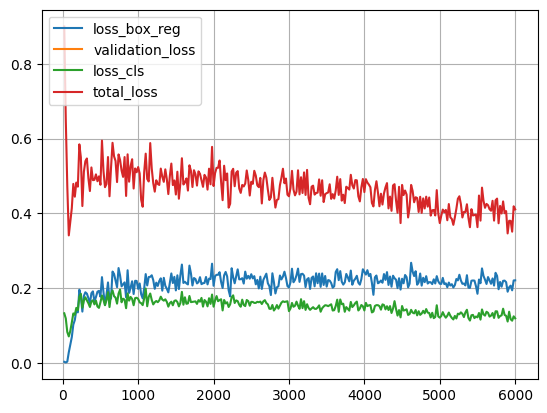

In [29]:
# Taken from https://eidos-ai.medium.com/training-on-detectron2-with-a-validation-set-and-plot-loss-on-it-to-avoid-overfitting-6449418fbf4e
# https://gist.github.com/ortegatron/c0dad15e49c2b74de8bb09a5615d9f6b
import matplotlib.pyplot as plt 

resolution = "030"

for b in [5]:
    
    experiment_folder = latest_file
    def load_json_arr(json_path):
        lines = []
        with open(json_path, 'r') as f:
            for line in f:
                lines.append(json.loads(line))
        return lines

    experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

    plt.plot(
        [x['iteration'] for x in experiment_metrics if 'loss_box_reg' in x], 
        [x['loss_box_reg'] for x in experiment_metrics if 'loss_box_reg' in x])
    plt.plot(
        [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
        [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x])
    plt.plot(
        [x['iteration'] for x in experiment_metrics if 'loss_cls' in x], 
        [x['loss_cls'] for x in experiment_metrics if 'loss_cls' in x])
    plt.plot(
        [x['iteration'] for x in experiment_metrics if 'total_loss' in x], 
        [x['total_loss'] for x in experiment_metrics if 'total_loss' in x])
    plt.legend(['loss_box_reg', 'validation_loss', 'loss_cls', 'total_loss'], loc='upper left')

    
plt.grid()
plt.show()

In [ ]:
# visualise how the boxes look at the best model performance 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
import matplotlib.pyplot as plt 

APs = [list(i.items())[0][1]["AP"] for i in eval_objs]
RES = [int(r) for r in resolution_set]

plt.scatter(RES, APs)
plt.plot(RES, APs)
plt.grid()
plt.title("Average Precision (AP) scores against Image Resolution in cm")
plt.xlabel("Image Resolution in cm/pixel")
plt.ylabel("Average Precision (0-100)")
plt.show()

plt.savefig('../figures/mastergraph.png')

## Visualise

In [ ]:
# function to check whether detectron loads dataset correctly
## TODO JOHANNES: KANNST DU BITTE MAL CHECKEN, OB DER UNSER DATASET CATALOG RICHTIG LÄD?

In [ ]:
def my_dataset_function():
  ...
  return list[dict] in the following format

from detectron2.data import DatasetCatalog
DatasetCatalog.register("my_dataset", my_dataset_function)
# later, to access the data:
data: List[Dict] = DatasetCatalog.get("my_dataset")

In [ ]:
from detectron2.utils.visualizer import ColorMode

import random
import cv2
import matplotlib.pyplot as plt

def plot_sample(dataset_name, n=1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)
    
    for s in random.sample(dataset_custom, n):
        img = cv2.imread(s["file_name"])
        v = Visualizer(img[:, :, ::-1], metadata=dataset_custom_metadata, scale=0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize=(15,20))
        plt.imshow(v.get_image())
        plt.imshow()

In [ ]:
print(base_path)

In [ ]:
from detectron2.utils.visualizer import ColorMode

val_or_train = "train" # write a string here (either "val" or "train")
location = ""
dataset_dicts = json.load(open(f'{base_path}/labels_{val_or_train}.json'))

for d in random.sample(dataset_dicts['images'], 3):  
    im = cv2.imread(f'{base_path}/data_030/{val_or_train}/data/{d["file_name"]}')

    outputs = predictor_obj(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata= MetadataCatalog.get("tower_val1"), 
                   scale=0.5 
                   #,instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2.imshow(out.get_image()[:, :, ::-1])

In [ ]:
eval_objs

In [ ]:
import matplotlib.pyplot as plt

plt.plot(eval_obs[])